## Multi Layer Perceptrons

In [62]:
import numpy as np

In [63]:
input_size = 2 # no of features
layers = [4,3] # no of neurons in first and sencond layer
output_size = 2


In [64]:
def softmax(a):
    e_pa = np.exp(a) 
    ans = e_pa/np.sum(e_pa, axis = 1, keepdims = True)
    return ans
    

In [75]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        
        model = {}
        
        #first layer
        model['w1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))
        
        #second layer
        model['w2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))
        
        #output layer
        model['w3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))
        
        self.model = model
    
    def forward(self,x):
        
        W1, W2, W3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x,W1)+b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self, X, y,learning_rate = 0.001):
        W1, W2, W3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['w3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_-y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2, axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        
        self.model['w1'] -=learning_rate*dw1
        self.model['b1'] -=learning_rate*db1
        
        self.model['w2'] -=learning_rate*dw2
        self.model['b2'] -=learning_rate*db2
        
        self.model['w3'] -=learning_rate*dw3
        self.model['b3'] -=learning_rate*db3
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis = 1)
    
    
        
    
    
    

In [76]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l 

def one_hot(y, depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1

    return y_oht
    
    

In [77]:
def train(X,Y,model,epochs,learning_rate,logs = True):
    training_loss = []
    
    classes = 2
    y_oht = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        y_ = model.forward(X)
        l = loss(y_oht,y_)
        training_loss.append(l)
        model.backward(X,y_oht,learning_rate)
        
        if (logs):
            print("epoch %d loss %f"%(ix,l))
            
    return training_loss

In [68]:
model = NeuralNetwork(input_size = 2, layers = [10,5], output_size = 2)

## XOR Dataset

In [57]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

In [58]:
losses = train(X,Y,model,100,0.1)

epoch 0 loss 0.342702
epoch 1 loss 0.255870
epoch 2 loss 0.216245
epoch 3 loss 0.194929
epoch 4 loss 0.179687
epoch 5 loss 0.165584
epoch 6 loss 0.151407
epoch 7 loss 0.137308
epoch 8 loss 0.123851
epoch 9 loss 0.111479
epoch 10 loss 0.100397
epoch 11 loss 0.090629
epoch 12 loss 0.082098
epoch 13 loss 0.074678
epoch 14 loss 0.068228
epoch 15 loss 0.062612
epoch 16 loss 0.057707
epoch 17 loss 0.053407
epoch 18 loss 0.049621
epoch 19 loss 0.046271
epoch 20 loss 0.043296
epoch 21 loss 0.040640
epoch 22 loss 0.038260
epoch 23 loss 0.036117
epoch 24 loss 0.034182
epoch 25 loss 0.032426
epoch 26 loss 0.030828
epoch 27 loss 0.029368
epoch 28 loss 0.028031
epoch 29 loss 0.026802
epoch 30 loss 0.025670
epoch 31 loss 0.024623
epoch 32 loss 0.023653
epoch 33 loss 0.022753
epoch 34 loss 0.021915
epoch 35 loss 0.021133
epoch 36 loss 0.020403
epoch 37 loss 0.019718
epoch 38 loss 0.019076
epoch 39 loss 0.018473
epoch 40 loss 0.017905
epoch 41 loss 0.017369
epoch 42 loss 0.016863
epoch 43 loss 0.01638

In [59]:
from matplotlib import pyplot as plt

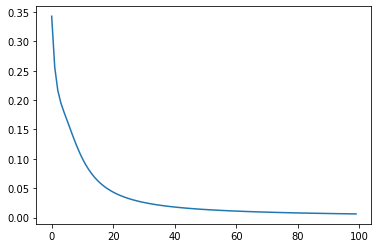

In [60]:
plt.plot(losses)
plt.show()

In [92]:
from sklearn.datasets import make_moons
x_tr,y_tr = make_moons(n_samples = 500, noise = 0.2,random_state=1)

model = NeuralNetwork(input_size = 2, layers = [8,4],output_size = 2)
train(x_tr,y_tr,model,1000,0.001,logs=False)
outputs = model.predict(x_tr)

training_accuracy = np.sum(outputs == y_tr)/y_tr.shape[0]
print('training_accuracy is', training_accuracy)


training_accuracy is 0.954
